In [1]:
from google.colab import drive


drive.mount("/content/drive") # This will prompt you to authorize access to your Google Drive

Mounted at /content/drive


In [2]:
import os

folder_path = "/content/drive/My Drive/Colab Notebooks/Sentiments"
print("Files in folder:", os.listdir(folder_path))


Files in folder: ['hotels_with_sentiment.csv', 'batch_100000_named_entities.csv', 'OPEN_AI_KEY.env']


In [3]:
import pandas as pd

csv_file = "/content/drive/My Drive/Colab Notebooks/Sentiments/hotels_with_sentiment.csv"
df = pd.read_csv(csv_file, encoding='utf-8')  # or 'ISO-8859-1' if needed

df.head()

,countyCode,countyName,cityCode,cityName,HotelCode,HotelName,HotelRating,Address,Description,HotelFacilities,Map,Description_Sentiment,HotelFacilities_Sentiment
0,AL,Albania,106078,Albanien,1003300,De Paris Hotel,4.0,Nr. 7 Brigada Viii Street Tirane,Hotel de Paris is a charming boutique hotel th...,Private parking Parking onsite Television in c...,41.32213|19.81665,0.9623,0.9231
1,AL,Albania,106078,Albanien,1003301,Hotel Green,4.0,Rruga Kavajes. Kombinat Km 2. Vaqarr VaqarrTir...,"Located in a suburb of Tirana, Hotel Green is ...",airport pick up wifi available in all areas Ai...,41.30413|19.74703,0.8807,0.5106
2,AL,Albania,106078,Albanien,1003302,Theranda Hotel,3.0,Rr. Andon Zako Cajupi Villa 6 & 7 Villa 6 & 7T...,"Set in Tirana, 1.2 km from Skanderbeg Square, ...",face masks for guests available all plates cu...,41.3216|19.81199,0.9393,0.9022
3,AL,Albania,106078,Albanien,1003303,Seven Hotel,3.0,"KAVAJA STREET, CLOSE TURKISH AMBASSY TIRANA",This hotel enjoys an enviable setting in Tiran...,À la carte dinner Breakfast buffet Breakfast C...,41.328027|19.815052,0.9896,0.0000
4,AL,Albania,106078,Albanien,1003325,Viktoria,3.0,Rruga E Elbasanit Km 4 Sauk SaukTirana,Located in a new residential area at the edge ...,internet services Ironing service Family rooms...,41.29125|19.85349,0.9694,0.8807


In [5]:
pip install spacy

In [4]:
import spacy

# Load the small English model, which includes a pre-trained NER component
nlp = spacy.load("en_core_web_sm")

In [ ]:
df['HotelFacilities'].isnull().sum()

np.int64(0)

In [5]:
import pandas as pd
import spacy
from tqdm import tqdm

# Select a batch of the first 100,000 records
batch_df = df.head(100000).copy()


nlp = spacy.load("en_core_web_sm")

# Get the texts from the HotelFacilities column
texts = batch_df['HotelFacilities'].tolist()

# Process the texts in batch using nlp.pipe with progress monitoring.
# Adjust batch_size and n_process as needed; here we use batch_size=100 and n_process=2.
docs = list(tqdm(nlp.pipe(texts, batch_size=1000, n_process=2), total=len(texts)))

# Extract Named Entities for each document and add as a new column.
# Each cell will contain a list of tuples (entity text, entity label).
batch_df['Named_Entities'] = [[(ent.text, ent.label_) for ent in doc.ents] for doc in docs]

# Optionally, convert the Named_Entities column to string for CSV export.
batch_df['Named_Entities'] = batch_df['Named_Entities'].apply(lambda x: str(x))

# Save the batch to a CSV file
output_csv = os.path.join(folder_path, "batch_100000_named_entities.csv")
batch_df.to_csv(output_csv, index=False)
print(f"File saved to {output_csv}")


100%|██████████| 100000/100000 [23:20<00:00, 71.40it/s]


File saved to /content/drive/My Drive/Colab Notebooks/Sentiments/batch_100000_named_entities.csv


In [7]:
print(batch_df['Named_Entities'].dtype)

object


In [8]:
print(type(batch_df['Named_Entities'].iloc[0]))

<class 'str'>


In [ ]:
#VISUALISATION

Most common entities (by text):
[('Wheelchair', 33976), ('24-hour', 26844), ('Smoke', 24626), ('first', 17323), ('CCTV', 16895), ('Sun', 15009), ('Air', 13491), ('Family', 13283), ('Swimming', 12612), ('Daily', 10060)]


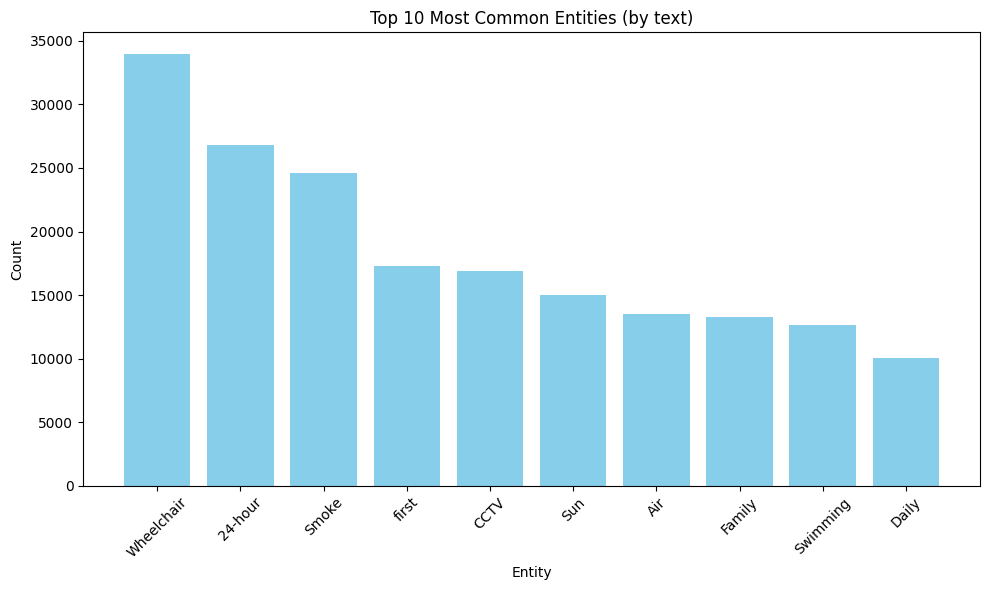


Most common entity labels:
[('ORG', 286916), ('PERSON', 93858), ('NORP', 50727), ('WORK_OF_ART', 31242), ('GPE', 30168), ('TIME', 29143), ('PRODUCT', 22248), ('ORDINAL', 17342), ('CARDINAL', 17264), ('DATE', 15184)]


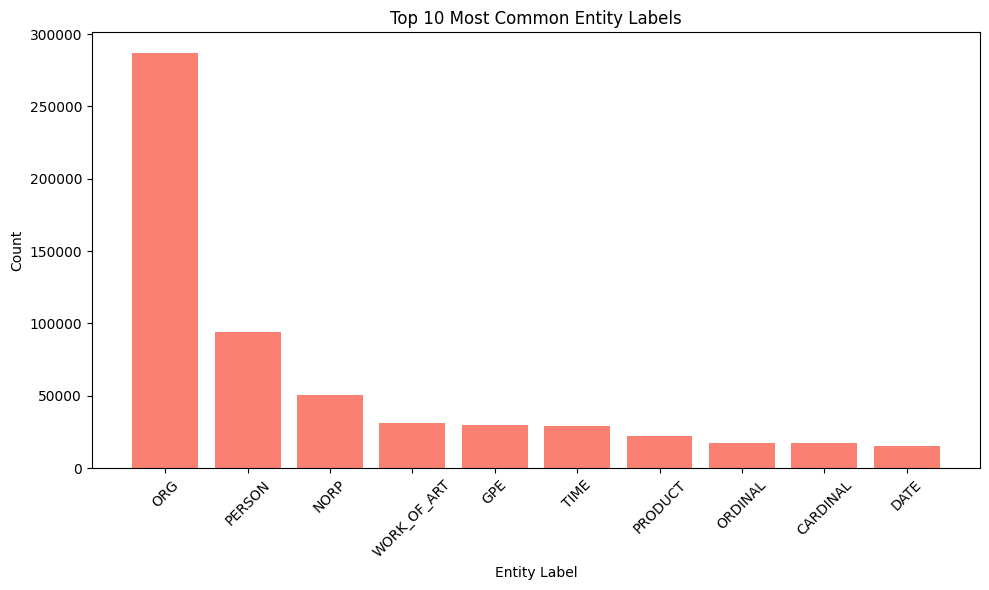

In [9]:
import matplotlib.pyplot as plt
from collections import Counter
import ast


def parse_named_entities(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except Exception as e:
            return []
    return x

batch_df['Named_Entities'] = batch_df['Named_Entities'].apply(parse_named_entities)

# Flatten the list of entity tuples from all rows in the Named_Entities column
all_entities = [ent for sublist in batch_df['Named_Entities'] for ent in sublist]

# Create a counter for entity texts (e.g., "Pool", "WiFi", etc.)
entity_counter = Counter([ent for ent, label in all_entities])
top_entities = entity_counter.most_common(10)
print("Most common entities (by text):")
print(top_entities)

# Plot the top 10 entities (by text)
entities, counts = zip(*top_entities)
plt.figure(figsize=(10, 6))
plt.bar(entities, counts, color='skyblue')
plt.title("Top 10 Most Common Entities (by text)")
plt.xlabel("Entity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a counter for entity labels (e.g., GPE, ORG, etc.)
label_counter = Counter([label for ent, label in all_entities])
top_labels = label_counter.most_common(10)
print("\nMost common entity labels:")
print(top_labels)

# Plot the top 10 entity labels
labels, label_counts = zip(*top_labels)
plt.figure(figsize=(10, 6))
plt.bar(labels, label_counts, color='salmon')
plt.title("Top 10 Most Common Entity Labels")
plt.xlabel("Entity Label")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


SpaCy's pre-trained NER model (e.g., en_core_web_sm) uses a variety of labels to categorize entities. Here’s a list of common labels and what they mean:

PERSON: People, including fictional characters.

NORP: Nationalities, religious groups, or political groups.

FAC: Facilities such as buildings, airports, highways, bridges.

ORG: Organizations, including companies, agencies, institutions.

GPE: Geopolitical entities, including countries, cities, and states.

LOC: Other locations, like mountain ranges or bodies of water.

PRODUCT: Products, including objects, vehicles, foods, etc.

EVENT: Named events such as sports events, wars, or festivals.

WORK_OF_ART: Titles of creative works like books, songs, or paintings.

LAW: Named legal documents or laws.

LANGUAGE: Named languages.

DATE: Absolute or relative dates or periods.

TIME: Times smaller than a day.

PERCENT: Percentage expressions (e.g., "50%").

MONEY: Monetary values.

QUANTITY: Measurements or quantities (e.g., "10 kg", "5 miles").

ORDINAL: Ordinal numbers (e.g., "first", "second").

CARDINAL: Numerical values that don't fall under another category.

In [10]:
batch_df.head()

,countyCode,countyName,cityCode,cityName,HotelCode,HotelName,HotelRating,Address,Description,HotelFacilities,Map,Description_Sentiment,HotelFacilities_Sentiment,Named_Entities
0,AL,Albania,106078,Albanien,1003300,De Paris Hotel,4.0,Nr. 7 Brigada Viii Street Tirane,Hotel de Paris is a charming boutique hotel th...,Private parking Parking onsite Television in c...,41.32213|19.81665,0.9623,0.9231,"[(Parking onsite Television, ORG), (Airport, P..."
1,AL,Albania,106078,Albanien,1003301,Hotel Green,4.0,Rruga Kavajes. Kombinat Km 2. Vaqarr VaqarrTir...,"Located in a suburb of Tirana, Hotel Green is ...",airport pick up wifi available in all areas Ai...,41.30413|19.74703,0.8807,0.5106,"[(Air, ORG), (Luggage, PERSON), (Packed, PERSO..."
2,AL,Albania,106078,Albanien,1003302,Theranda Hotel,3.0,Rr. Andon Zako Cajupi Villa 6 & 7 Villa 6 & 7T...,"Set in Tirana, 1.2 km from Skanderbeg Square, ...",face masks for guests available all plates cu...,41.3216|19.81199,0.9393,0.9022,"[(Shuttle, GPE), (Fruits Wine, WORK_OF_ART), (..."
3,AL,Albania,106078,Albanien,1003303,Seven Hotel,3.0,"KAVAJA STREET, CLOSE TURKISH AMBASSY TIRANA",This hotel enjoys an enviable setting in Tiran...,À la carte dinner Breakfast buffet Breakfast C...,41.328027|19.815052,0.9896,0.0000,"[(Breakfast, LOC), (Breakfast Conference room ..."
4,AL,Albania,106078,Albanien,1003325,Viktoria,3.0,Rruga E Elbasanit Km 4 Sauk SaukTirana,Located in a new residential area at the edge ...,internet services Ironing service Family rooms...,41.29125|19.85349,0.9694,0.8807,"[(Family, PRODUCT), (Laundry Airport, FAC), (G..."


In [4]:

import ast


csv_path = "/content/drive/My Drive/Colab Notebooks/Sentiments/batch_100000_named_entities.csv"
hotel_df = pd.read_csv(csv_path, encoding='ISO-8859-1')


hotel_df['Named_Entities'] = hotel_df['Named_Entities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

print(hotel_df.head())


  countyCode countyName  cityCode  cityName  HotelCode       HotelName  \
0         AL    Albania    106078  Albanien    1003300  De Paris Hotel   
1         AL    Albania    106078  Albanien    1003301     Hotel Green   
2         AL    Albania    106078  Albanien    1003302  Theranda Hotel   
3         AL    Albania    106078  Albanien    1003303     Seven Hotel   
4         AL    Albania    106078  Albanien    1003325        Viktoria   

   HotelRating                                            Address  \
0          4.0                  Nr. 7 Brigada Viii Street Tirane    
1          4.0  Rruga Kavajes. Kombinat Km 2. Vaqarr VaqarrTir...   
2          3.0  Rr. Andon Zako Cajupi Villa 6 & 7 Villa 6 & 7T...   
3          3.0       KAVAJA STREET, CLOSE TURKISH AMBASSY TIRANA    
4          3.0            Rruga E Elbasanit Km 4 Sauk SaukTirana    

                                         Description  \
0  Hotel de Paris is a charming boutique hotel th...   
1  Located in a suburb of Ti

In [5]:
from langchain.docstore.document import Document

docs = []
for idx, row in hotel_df.iterrows():
    # Build a text representation of the hotel profile.
    # Feel free to adjust the formatting or the fields included.
    text = (
        f"Hotel Name: {row['HotelName']}\n"
        f"Description: {row['Description']}\n"
        f"Facilities: {row['HotelFacilities']}\n"
        f"Description Sentiment: {row['Description_Sentiment']}\n"
        f"Facilities Sentiment: {row['HotelFacilities_Sentiment']}\n"
        f"Named Entities: {row['Named_Entities']}\n"
    )
    # Create a Document with metadata (using HotelCode as the unique identifier)
    docs.append(Document(page_content=text, metadata={"hotel_id": row["HotelCode"]}))

print(f"Created {len(docs)} documents from hotel profiles.")


Created 100000 documents from hotel profiles.


In [6]:
pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.3/423.3 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.49
    Uninstalling langchain-core-0.3.49:
      Successfully uninstalled langchain-core-0.3.49
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.3.7
    Uninstalling langchain-text-splitters-0.3.7:
      Successfully uninstalled langchain-text-splitters-0.3.7
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.22
    Uninstalling langchain-0.3.22:
      Successfully uninstalled langchain-0.3.22


In [9]:
pip install python-dotenv


In [7]:
import os
from dotenv import load_dotenv


env_path = '/content/drive/MyDrive/Colab Notebooks/Sentiments/OPEN_AI_KEY.env'
load_dotenv(dotenv_path=env_path)

# Now, check if the API key is loaded
openai_api_key = os.getenv("OPENAI_API_KEY")
print("API key loaded:", openai_api_key is not None)



API key loaded: True


In [10]:
pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 55.9 MB/s eta 0:00:00


In [13]:
pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 21.8 MB/s eta 0:00:00


In [14]:
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS

embeddings = OpenAIEmbeddings()

small_batch_docs = docs[:1000]  # Adjust the number as needed

# Create a FAISS vector store for this small batch
vectorstore = FAISS.from_documents(small_batch_docs, embeddings)

# Define the destination path on your Google Drive
save_path = "/content/drive/My Drive/Colab Notebooks/Sentiments/faiss_index_small_batch"

# Create the directory if it doesn't exist
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Save the vector store
vectorstore.save_local(save_path)
print("Vector store for small batch saved to:", save_path)

Vector store for small batch saved to: /content/drive/My Drive/Colab Notebooks/Sentiments/faiss_index_small_batch


In [15]:
from langchain.chains import RetrievalQA
from langchain.llms import OpenAI


In [16]:
# This initializes the OpenAI LLM; ensure OPENAI_API_KEY is set in your environment.
llm = OpenAI(temperature=0)


<ipython-input-16-94b6358e18cf>:2: LangChainDeprecationWarning: The class `OpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAI``.
  llm = OpenAI(temperature=0)


In [17]:
# Create a retrieval chain that uses the vectorstore as the retriever.
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",  # "stuff" concatenates the retrieved documents as context for the LLM.
    retriever=vectorstore.as_retriever(),
    return_source_documents=True  # Optionally, include source documents in the output.
)


In [19]:
# Define a sample user query
query = "I want a hotel in Albania with a pool and excellent service."

# Use the invoke method instead of run
rag_output = qa_chain.invoke(query)

print("RAG Output:")
print("Recommendation:", rag_output["result"])
print("Source Documents:", rag_output["source_documents"])


RAG Output:
Recommendation:  Hotel Albania would be a great choice for you as it features a swimming pool and has a high sentiment score for its facilities and description.
Source Documents: [Document(id='0bf89dfb-56e3-484c-8fbd-43b399985457', metadata={'hotel_id': 1940576}, page_content="Hotel Name: Hotel Albania\nDescription: Hotel Albania features a garden, terrace, a restaurant and bar in VelipojÃ«. The property is set 500 metres from Velipoja Beach, 2.2 km from Rana e Hedhun Beach and 30 km from Rozafa Castle Shkodra. The accommodation offers a 24-hour front desk, airport transfers, room service and free WiFi throughout the property.\n\nThe units in the hotel are equipped with air conditioning, a seating area, a flat-screen TV with satellite channels, a kitchen, a dining area and a private bathroom with free toiletries, a bidet and a shower. All rooms will provide guests with a fridge.\n\nGuests at Hotel Albania can enjoy a continental breakfast.\n\nGuests at the accommodation wil

In [ ]:
# DO NOT EVER PROCESS LINE BY LINE
def get_entities(text):
    """
    Process a text string with spaCy to extract named entities.

    Args:
        text (str): The input text (e.g., a hotel review or description).

    Returns:
        List of tuples: Each tuple contains (entity text, entity label)
    """

    # Ensure the input is a string and process it through spaCy
    doc = nlp(str(text))

    # Extract entities: each 'ent' contains the text and its label (e.g., GPE, ORG)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities
